## Bonertz, Brian
## DSC630
## Week 3

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dodgers = pd.read_csv('dodgers-2022.csv')
print(dodgers.shape)
dodgers.head()

(81, 12)


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


### Introduction

Ticket sales are the life blood of the Dodgers organization. Thriving ticket sales allow the organization to lobby highly recruited athletes which drives better win percentage and in turn generate larger revenue across the country through commercialization and brand association. 
Using the data accumulated throughout the 2022 season, we will explore variables or factors that seem to correlate with higher ticket sales. This dataset contains 81 rows and 12 columns. Such attributes in the dataset that will be examined are listed below:

Day of the week

Opponent

Local temperature of the game

Sky conditions

Time of the game (Day or Night)

If Caps, shirts, or bobbleheads are offered to ticket holders

If fireworks were displayed during the event



### Problem Statement

Based on the data collected in the dataset: What variables seem to improve attendance?

### Data Understanding

We will begin by exploring the dataset and evaluate for missing data, outliers, or errors in the data. 

In [3]:
#Below, check to see if null values exist in the dataset.
#The dataset does not contain missing values. 

dodgers.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

Next we will evaluate the data for outliers or errors

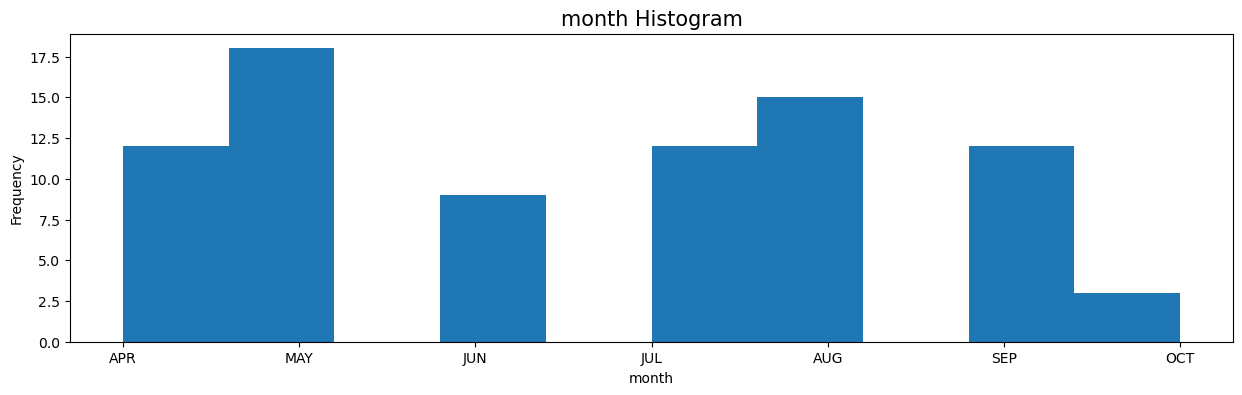

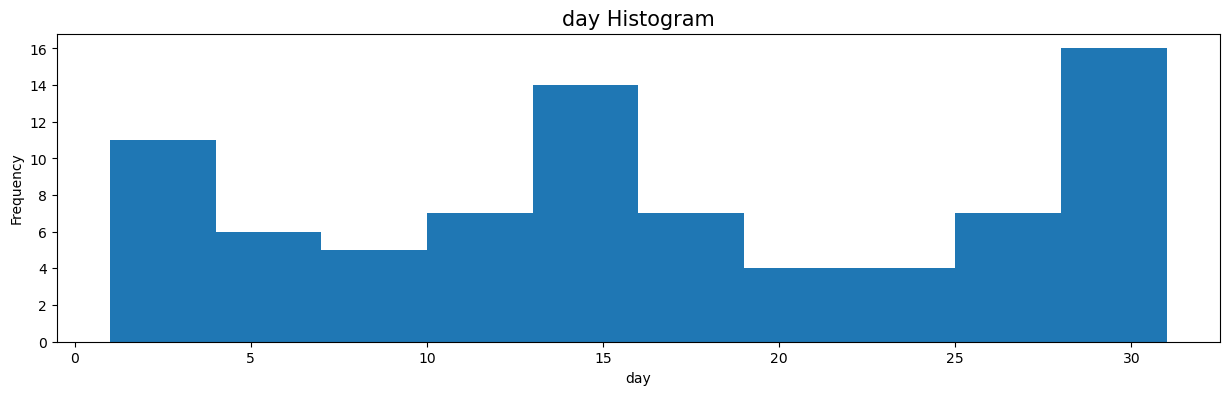

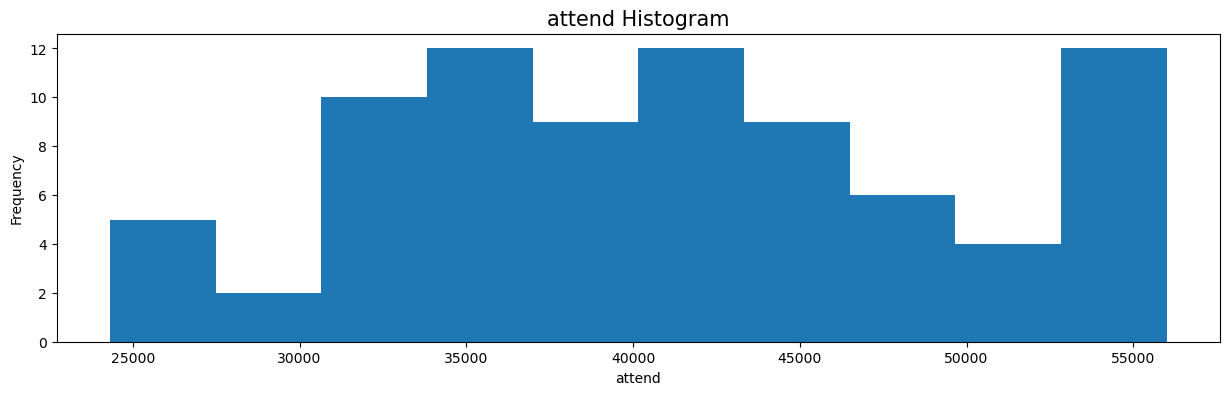

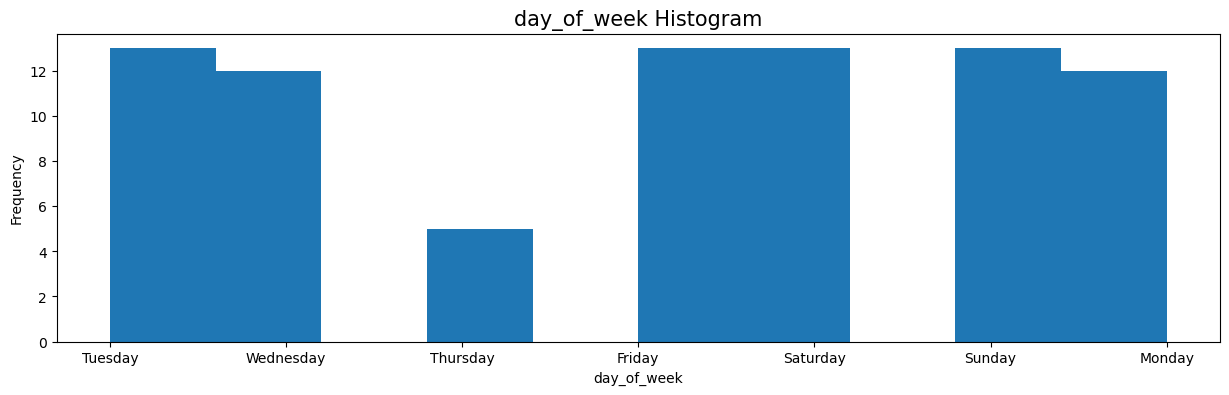

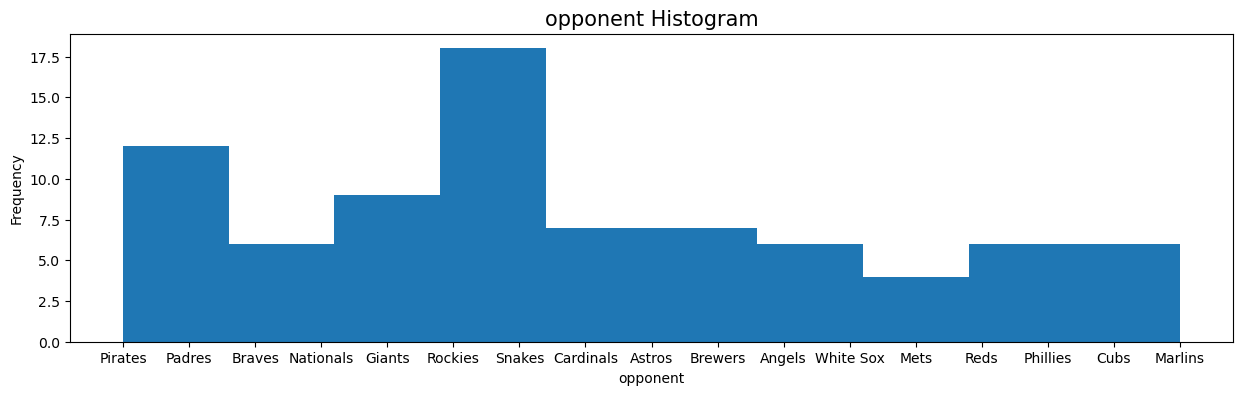

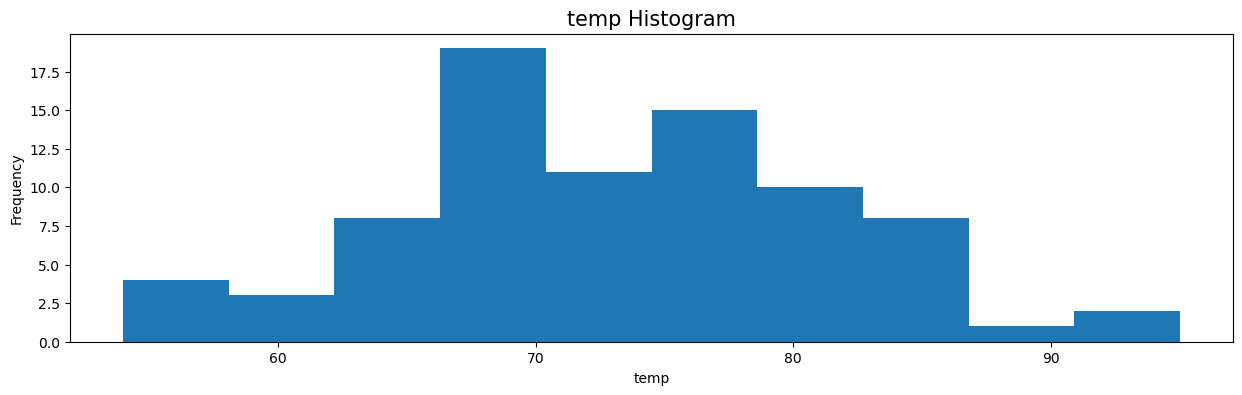

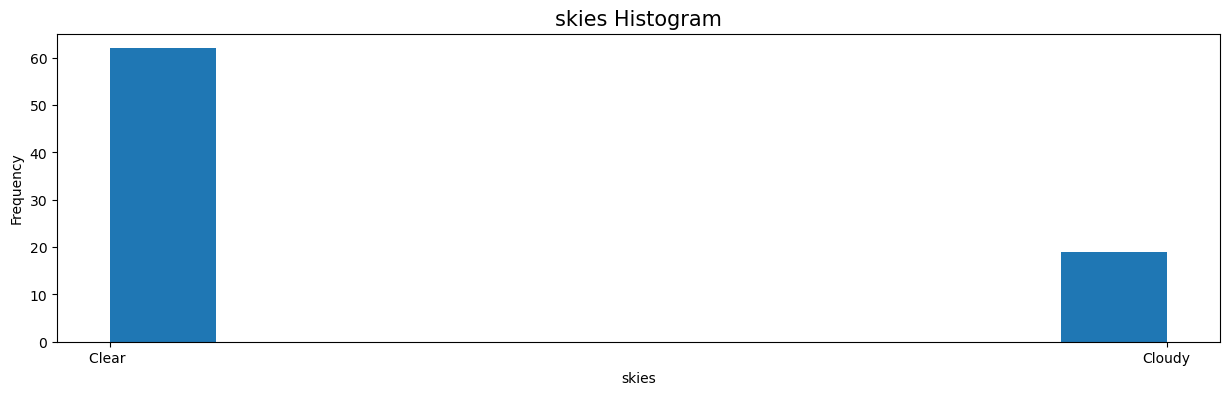

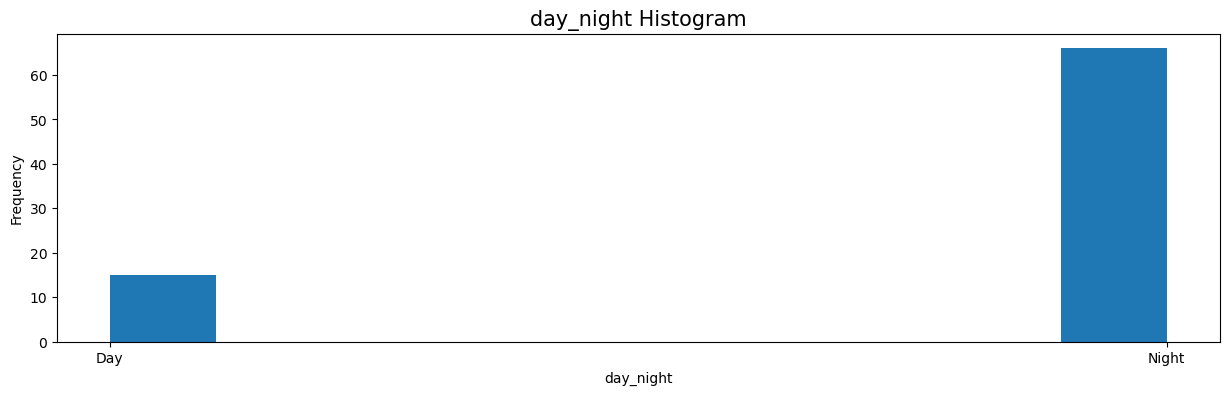

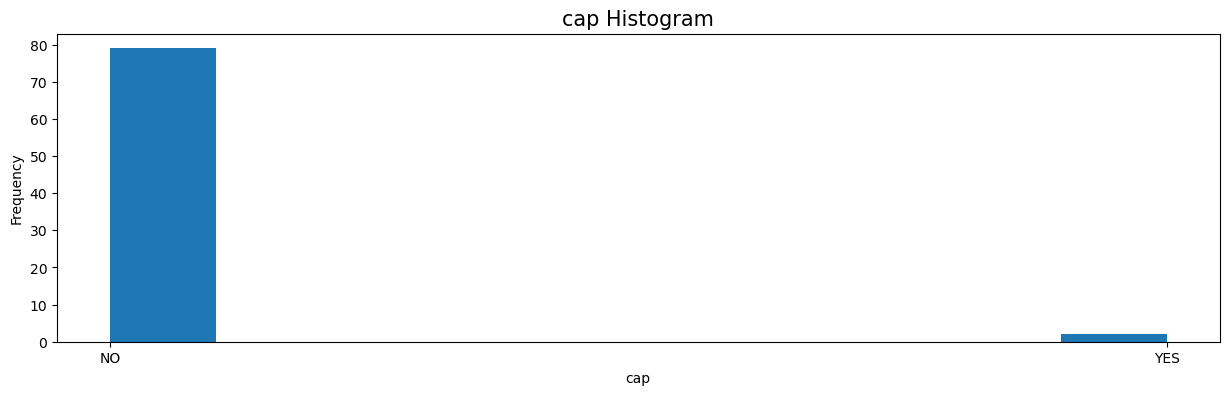

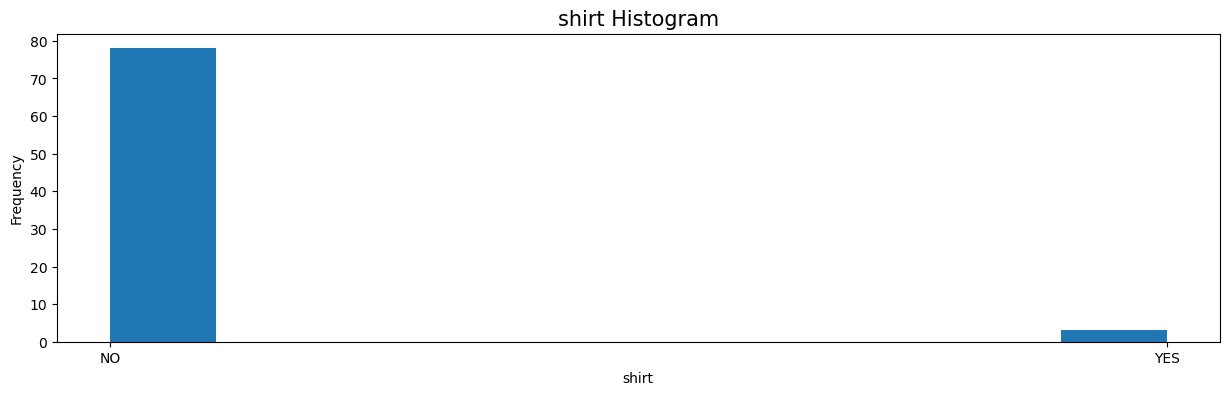

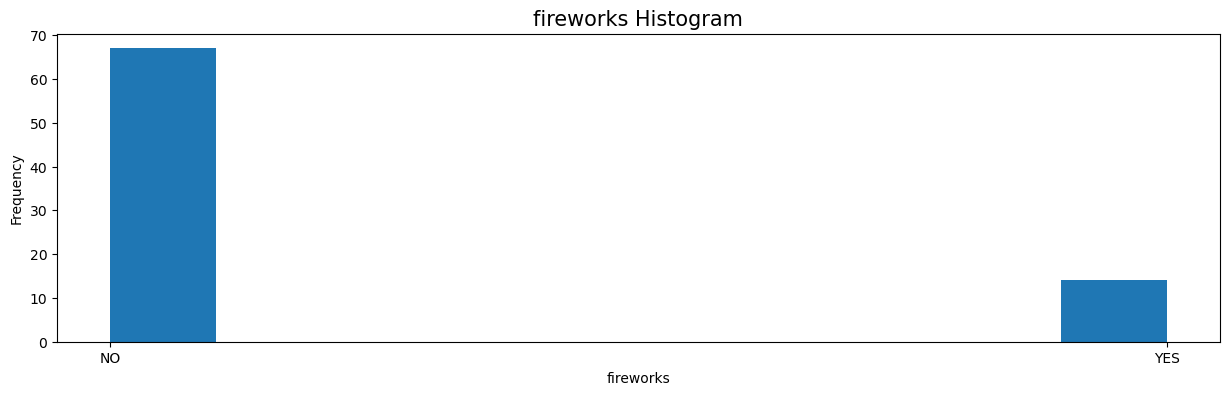

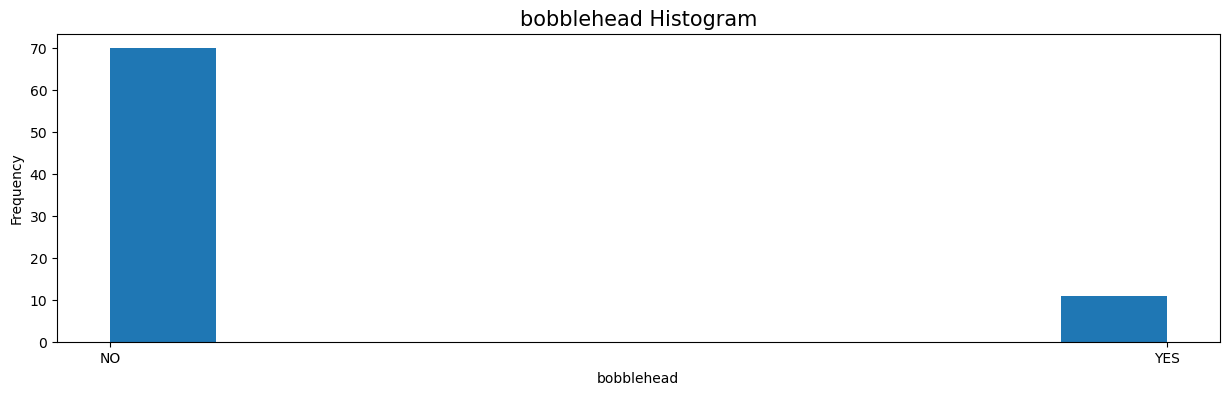

In [4]:
#Histogram will be used on each column to evaluate frequency of each element in the column and check for outliers. 

for colname in dodgers.columns: #selects the first value in the dataframe.columns and assigns to colname
    plt.figure(figsize=(15,4))
    plt.title(colname+" Histogram",fontsize=15)   #applies the title with the colname
    plt.hist(dodgers[colname])  #plots that column in a histogram using the colname
    plt.xlabel(colname)   #x label, and ylabel is below
    plt.ylabel("Frequency")
    plt.show()

In [5]:
#The opponent histogram is crowded and difficult to see all the names of the opponents, so i will do value counts to get a 
#better understanding

dodgers['opponent'].value_counts()

Giants       9
Rockies      9
Snakes       9
Padres       9
Cardinals    7
Mets         4
Brewers      4
Pirates      3
Cubs         3
Phillies     3
Reds         3
Astros       3
White Sox    3
Angels       3
Nationals    3
Braves       3
Marlins      3
Name: opponent, dtype: int64

### Histogram Analysis

After review of all the histograms, there doesn't seem to be any outliers or errors in the data. 

Month histogram: There doesn't seem to be much variance in the frequency for the month. October is lower than the other months, but that is when the season is ending.

Day histogram: It seems more games are placed at the beginning of the month, on the 15th of the month and on the 30th. This could be tied to scheduling.

Attend histogram: Most frequency between the 33,000 to 45,000 range. There is also a jump in the attendance of 55,000 bar. This says a couple things. The bell shaped curve from 33,000 - 45,000 range indicates a reletively normal distribution in attendance, however, the jump in attendance levels of 55,000 doesn't seem to relative to the normal distribution. This suggests that there is something setting that bar outside of the normal distribution. Something is causing this jump in attendance that does not align with the rest of the distribution. 

Day of Week histogram: Evenly spread except for Thursday games. 

Opponent histogram: Most games are played against the Giants, Rockies, Snakes, Padres, and Cardinals

Temp histogram: Holds a nice bell-shaped curve. Most temperatures falling in a comfortable 65 – 85 degrees.

Skies histogram: Mostly clear

Day_night histogram: Mostly night games

Cap histogram: Most games caps are not offered.

Shirt histogram: Most games shirts are not offered.

Fireworks histogram: Most games do not have fireworks. 

Bobblehead histogram: Most games bobbleheads are not offered. 

### Data Preparation

In this step we will attempt to evaluate the correlation of the variables in the dataset. 

First we will begin by converting all the values to numerical values using dummy variables. 

In [6]:
dummy_df = pd.get_dummies(dodgers)
print(dummy_df.shape)

(81, 46)


Next we will use corr() to examine the correlation between the variables.

In [7]:
dodgers_corr = dummy_df.corr()
dodgers_corr.round(2)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
day,1.00,0.03,-0.13,0.14,-0.03,-0.11,0.11,0.16,-0.29,-0.12,...,0.04,-0.04,0.20,-0.20,0.03,-0.03,-0.10,0.10,-0.15,0.15
attend,0.03,1.00,0.10,-0.07,0.10,0.14,0.30,-0.24,-0.10,-0.11,...,0.04,-0.04,0.06,-0.06,-0.13,0.13,-0.00,0.00,-0.58,0.58
temp,-0.13,0.10,1.00,-0.51,0.24,0.00,-0.11,-0.30,0.25,0.56,...,0.27,-0.27,-0.06,0.06,-0.00,0.00,0.19,-0.19,-0.05,0.05
month_APR,0.14,-0.07,-0.51,1.00,-0.20,-0.17,-0.15,-0.22,-0.08,-0.17,...,0.07,-0.07,0.07,-0.07,-0.10,0.10,0.01,-0.01,0.06,-0.06
month_AUG,-0.03,0.10,0.24,-0.20,1.00,-0.20,-0.17,-0.25,-0.09,-0.20,...,0.02,-0.02,-0.13,0.13,0.09,-0.09,-0.03,0.03,-0.09,0.09
month_JUL,-0.11,0.14,0.00,-0.17,-0.20,1.00,-0.15,-0.22,-0.08,-0.17,...,-0.02,0.02,-0.16,0.16,0.08,-0.08,0.01,-0.01,-0.14,0.14
month_JUN,0.11,0.30,-0.11,-0.15,-0.17,-0.15,1.00,-0.19,-0.07,-0.15,...,0.03,-0.03,0.06,-0.06,-0.14,0.14,-0.05,0.05,-0.09,0.09
month_MAY,0.16,-0.24,-0.30,-0.22,-0.25,-0.22,-0.19,1.00,-0.10,-0.22,...,-0.10,0.10,0.09,-0.09,0.10,-0.10,0.01,-0.01,0.04,-0.04
month_OCT,-0.29,-0.10,0.25,-0.08,-0.09,-0.08,-0.07,-0.10,1.00,-0.08,...,-0.09,0.09,0.03,-0.03,0.04,-0.04,0.09,-0.09,0.08,-0.08
month_SEP,-0.12,-0.11,0.56,-0.17,-0.20,-0.17,-0.15,-0.22,-0.08,1.00,...,0.07,-0.07,0.07,-0.07,-0.10,0.10,0.01,-0.01,0.17,-0.17


There are a few take aways from the correlation matrix we see above. Interrestingly, bobbleheads have the highest correlation when compared to the attendance. There is a positive correlation between the months of June and July which corresponds to comfortable temperature and attendance. Interrestingly, Tuesday has the highest positive correlation with the day of the week and attendance, with the weekend just behind. Games played against the Angles, Mets, Nationals, and White Sox have better attenance for opponents. And finally some correlation when shirts or caps are offered. 

But before we do, there are a few things we need to consider. The problem statement is to make recommendations to management on how improve attendance. Considering this, there are some variables within the dataset that we or management may not be able to control. According to an article by closeseats.com titled "How Does Major League Baseball (MLB) Make A Schedule for All 30 Teams Each Year", the schedule is made with a predetermined amount of games for each team to compete against each other. Individual ball clubs or management don't influence the oponent or the schedule of the game. Therefore, if a particular opponent drew larger ticket sales, there is little that the club or management can do to play that opponent more often and improve attendance. This would also include the date and time of the game. There is little that management can do influence the day of the week, date of the game or manipulate the time of the game from night game to day game.

Some of the variables in the dataset we can control are the fireworks, shirts, caps, and bobbleheads. Therefore we will focus on these variables in correlation to attendance. 

The below code will be used to drop the variables that we can not control and focus on attendence, fireworks, shirts, caps, and bobbleheads.

In [8]:
dodgers_cl = dodgers.drop(['month', 'day', 'day_of_week', 'opponent', 'temp', 'skies', 'day_night'], axis=1)
dodgers_cl.head()

,attend,cap,shirt,fireworks,bobblehead
0,56000,NO,NO,NO,NO
1,29729,NO,NO,NO,NO
2,28328,NO,NO,NO,NO
3,31601,NO,NO,YES,NO
4,46549,NO,NO,NO,NO


We will look at the average and standard deviation of attendance on days where fireworks are set off and days where caps, shirts, and bobbleheads are offered in comparison to days where they are not. 

In [12]:

bobble = dodgers_cl.groupby("bobblehead").agg([np.mean, np.std])
cap = dodgers_cl.groupby("cap").agg([np.mean, np.std])
shirt = dodgers_cl.groupby("shirt").agg([np.mean, np.std])
fireworks = dodgers_cl.groupby("fireworks").agg([np.mean, np.std])

attendance1 = bobble['attend'].round(2)
print(attendance1.head())

attendance2 = cap['attend'].round(2)
print(attendance2.head())

attendance3 = shirt['attend'].round(2)
print(attendance3.head())

attendance4 = fireworks['attend'].round(2)
print(attendance4.head())

                mean      std
bobblehead                   
NO          39137.93  7182.49
YES         53144.64  2887.15
         mean      std
cap                   
NO   41112.24  8362.15
YES  38189.50  6088.90
           mean      std
shirt                   
NO     40824.55  8338.64
YES    46643.67  5295.08
               mean      std
fireworks                   
NO         41032.18  8769.22
YES        41077.86  5768.35


We see a noticable difference in attendance on days where bobbleheads are offered. Averaging approximately 14,000 more in attendance when offered. Also, we see improved average attendance when shirts are offered. 

There is not a lot of affect on attendance when we set off fireworks or offer caps. 

<Axes: title={'center': 'Average Attendance with or without bobbleheads'}, ylabel='bobblehead'>

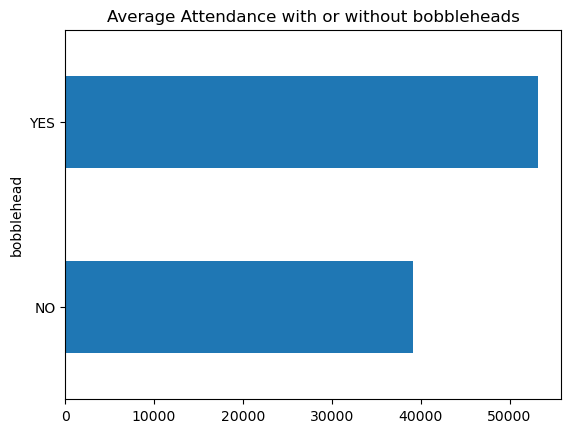

In [13]:
#Visual of the average attendance when bobbleheads are offered and when not. 

attendance.plot(kind = "barh", y = "mean", legend = False,
            title = "Average Attendance with or without bobbleheads")

In [28]:
#Using this below to get an idea of how often bobbleheads were offered last season. 

dodgers_cl['bobblehead'].value_counts()

NO     70
YES    11
Name: bobblehead, dtype: int64

### Modeling

Now that we know bobble heads seem to have a postive affect on attenance, we can use logistic regression to predict the attendance. 

In [16]:
#import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

We will convert the dodgers_cl dataset to dummy varables and then split the data to test and train data

In [17]:
dummy_df1 = pd.get_dummies(dodgers_cl)
print(dummy_df1.shape)

(81, 9)


In [18]:
dummy_df1.head()

,attend,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,56000,1,0,1,0,1,0,1,0
1,29729,1,0,1,0,1,0,1,0
2,28328,1,0,1,0,1,0,1,0
3,31601,1,0,1,0,0,1,1,0
4,46549,1,0,1,0,1,0,1,0


We will split the dummy dataset into test and train datasets

In [32]:
dummy_df1.drop(['bobblehead_NO'], axis=1)

X = dummy_df1.drop('bobblehead_YES',axis=1)
Y = dummy_df1[['bobblehead_YES']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((64, 8), (17, 8), (64, 1), (17, 1))

Then we will use standard scaler to scale our data and make it consistent to model.

In [33]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
#check the x_train_scaled data

x_train_scaled

array([[-1.28689270e-01,  1.79605302e-01, -1.79605302e-01,
         2.21766381e-01, -2.21766381e-01,  4.04519917e-01,
        -4.04519917e-01,  3.50438322e-01],
       [-1.09735089e+00,  1.79605302e-01, -1.79605302e-01,
         2.21766381e-01, -2.21766381e-01, -2.47206616e+00,
         2.47206616e+00,  3.50438322e-01],
       [-2.98846098e-01,  1.79605302e-01, -1.79605302e-01,
         2.21766381e-01, -2.21766381e-01,  4.04519917e-01,
        -4.04519917e-01,  3.50438322e-01],
       [ 4.73021123e-01,  1.79605302e-01, -1.79605302e-01,
         2.21766381e-01, -2.21766381e-01,  4.04519917e-01,
        -4.04519917e-01,  3.50438322e-01],
       [ 1.84995955e+00,  1.79605302e-01, -1.79605302e-01,
         2.21766381e-01, -2.21766381e-01,  4.04519917e-01,
        -4.04519917e-01, -2.85356919e+00],
       [ 6.08856015e-02,  1.79605302e-01, -1.79605302e-01,
         2.21766381e-01, -2.21766381e-01, -2.47206616e+00,
         2.47206616e+00,  3.50438322e-01],
       [-1.85565038e+00,  1.796053

In [35]:
#check the x_test_scaled data

x_test_scaled

array([[ 0.76815049,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
         0.40451992, -0.40451992,  0.35043832],
       [-1.33036741,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
         0.40451992, -0.40451992,  0.35043832],
       [ 1.33438561,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
         0.40451992, -0.40451992, -2.85356919],
       [ 0.38837837,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
        -2.47206616,  2.47206616,  0.35043832],
       [ 0.18548471,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
         0.40451992, -0.40451992,  0.35043832],
       [-0.41485646,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
         0.40451992, -0.40451992,  0.35043832],
       [ 1.08381816,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
         0.40451992, -0.40451992,  0.35043832],
       [ 1.93970577,  0.1796053 , -0.1796053 ,  0.22176638, -0.22176638,
         0.40451992, -0.40451992, -2.85356919],
       [-0.44049823,  0.1796053 

Next we will fit the datat in a logisitc regression model and check the coefficient and intercept

In [36]:
log_reg = LogisticRegression(random_state = 0).fit(x_train_scaled, y_train)
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 0.63698095  0.05964663 -0.05964663  0.10514859 -0.10514859  0.14372006
  -0.14372006 -1.85021587]]
[-3.98524096]


Then we will run our prediction and check the score

In [37]:
log_reg_pred = log_reg.predict(x_test_scaled)
log_reg_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [38]:
log_reg.score(x_train_scaled, y_train)

1.0

In [39]:
log_reg.score(x_test_scaled, y_test)

1.0

It appears that the model has a strong score which indicates a good model fit. Perfect actually.

In [40]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred, average='weighted')
recall = recall_score(y_test, log_reg_pred, average='weighted')
f1 = f1_score(y_test, log_reg_pred, average='weighted')


# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


The above shows that the model has a really good fit. Such strong numbers may indicate overfitting, but in this case it is likely that the bobble heads have this strong correlation with attendance. 

In [41]:
log_prob = log_reg.predict_proba(x_test)[:, 1]

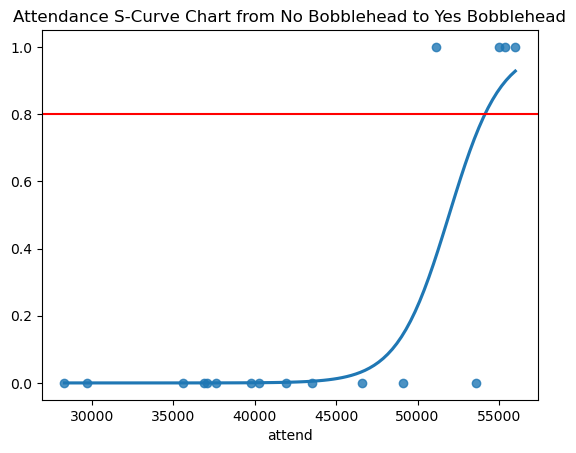

In [43]:
prediction = log_reg_pred
attend = x_test['attend']

sns.regplot(x=attend, y=prediction, data=dummy_df1, logistic=True, ci=None)
plt.title("Attendance S-Curve Chart from No Bobblehead to Yes Bobblehead")
plt.axhline(y=0.8, color='r', linestyle='-')

### Evaluation

From the model above, we are successful in training the data set and fitting to a logistic regression model with precision and accuracy. Based on the detail provided, by offering bobbleheads, we can predict attendance at around 54,000 tickets with an 80% accuracy

Other preliminary review, shows that selling shirts also has a positive affect on ticket sales. So the recommendation to management would be to offer shirts and bobbleheads at games. We can continue to collect the data for upcoming seasons to assess the results. As social trends evolve, the organisation will also need to adjust and compensate. 